In [202]:
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline

# Introduction
Climate change is an undeniable reality of our time and its impacts are becoming increasingly prevalent. Every year, we see global record high temperatures as they consistently rise year after year, leading to a variety of environmental changes and pitfalls which are already affecting ecosystems and human society; increased natural disasters, heat waves, rising ocean levels, and much more. However, one of the largest tell-tale signs of our speedy climate shift is the exponential rise of carbon dioxide levels since the start of the industrial revolution. This increase in greenhouse gases has already, and will continue to kill forests all over the world as the CO2 kills their natural habitat. 

This data story is intended for two main groups: those willing and capable of caring about our climate and this impending disaster that our generation faces, and those more ignorant folk who refuse to believe that our climate is changing, let alone killing us. I believe that maybe, if the data can be displayed in easy, simple visualizations, maybe it can finally convince those members, typically of older generations, that refuse to see the truth right before their eyes. As someone who is online quite often, I see all too often where a certain group of people with a certain group of beliefs (will not name) denies abject reality in front of them or almost willfully misinterprets climate change data in front of them. I see people say "well CO2 levels have always fluctuated" or "humanity has went through ice ages before, the climate is always changing!". While it is true that we have went through ice ages and CO2 levels fluctuate, this shows a fundamental misunderstanding of the data behind climate change and WHY it is a problem. Through these simple visualizations, I hope to help those ignorant folk realize the danger that this planet is in.

As a precaution, I implore all readers to READ THE CAPTIONS! Do NOT just look at the visuals, or you may be at risk of misunderstanding the data. There are a few sections where I show some things that, at first, seem to go against my narrative - but through reading the paragraphs and captions, one will find that first impressions are not always what they seem. As an example, if you were to look at the two images displayed here, you may believe that rising CO2 levels makes me smile! But alas, if you were to read the caption, you would see that is not the case.

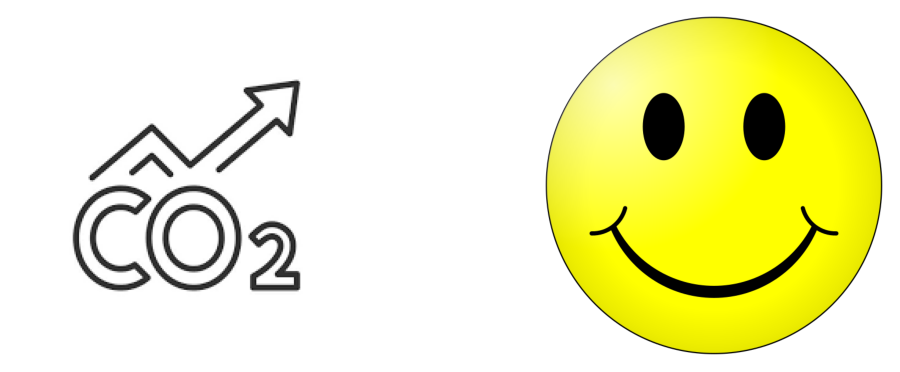

In [206]:
# figure size in inches optional
rcParams['figure.figsize'] = 11 ,8

# read images
img_A = mpimg.imread('co2up.png')
img_B = mpimg.imread('smiley.png')

# Display images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_A)
ax[0].axis('off')  # Hide axis for the first image
ax[1].imshow(img_B)
ax[1].axis('off')  # Hide axis for the second image

# Adjust subplot parameters to center the images
plt.subplots_adjust(left=0.1, right=0.9, wspace=.5)

plt.show()

_Left: The CO2 levels are rising on the planet.  Right: I am very happy to be sharing this information with you and hopefully change your mind._

# The Process 
One of the first things I did beyond brainstorming an idea for this project was finding the necessary datasets to adequately express and convey the information that I wanted. This was rather easy to start, as worldwide data regarding carbon dioxide and temperatures are very well documented throughout history. That was the issue though - most of these data were worldwide statistics. That was good for an overall idea of the dangers of climate change; however I wanted the reader to leave with an ultra clear idea of climate change and how it affects specific countries. 

In [162]:
# imports
import geopandas as gpd
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import display

# Reading in the data into dataframes

In [164]:
unavg_co2_df = pd.read_csv('co2.csv')
temps_dirty_df = pd.read_csv('temps_global.csv')
trees_df = pd.read_excel('forest-cover-v1.xlsx')

In [165]:
# Get rid of unnecessary columns
unavg_co2_df = unavg_co2_df[['Year', 'Carbon Dioxide Fit (ppm)']]

# group by year, calculate mean for ppm
co2_df = unavg_co2_df.groupby('Year')['Carbon Dioxide Fit (ppm)'].mean().reset_index()

# rename column
co2_df.columns = ['Year', 'Average CO2 (ppm)']

# Remove 1958 and 2017 to filter unclean data
co2_df = co2_df[~co2_df['Year'].isin([1958, 2017])]

# rename column
temps_dirty_df.columns = ['Year', 'AverageTemperature', 'Uncertainty', 'Country']

# Substring dates for readability
temps_dirty_df['Year'] = temps_dirty_df['Year'].astype(str).str[:4]

# cast years to int
temps_dirty_df['Year'] = temps_dirty_df['Year'].astype(int)

# Drop NaN Values
temps_dirty_df = temps_dirty_df[temps_dirty_df['AverageTemperature'].notna()]

temps_dirty_df = temps_dirty_df.sort_values(by=['Country', 'Year'])

# Average temps by year
temps_country_df = temps_dirty_df.groupby(['Year', 'Country']).agg({
    'AverageTemperature' : 'mean'}).reset_index()

temps_df = temps_dirty_df.groupby('Year')['AverageTemperature'].mean().reset_index()

correlation_df = pd.merge(temps_df, co2_df, on='Year')

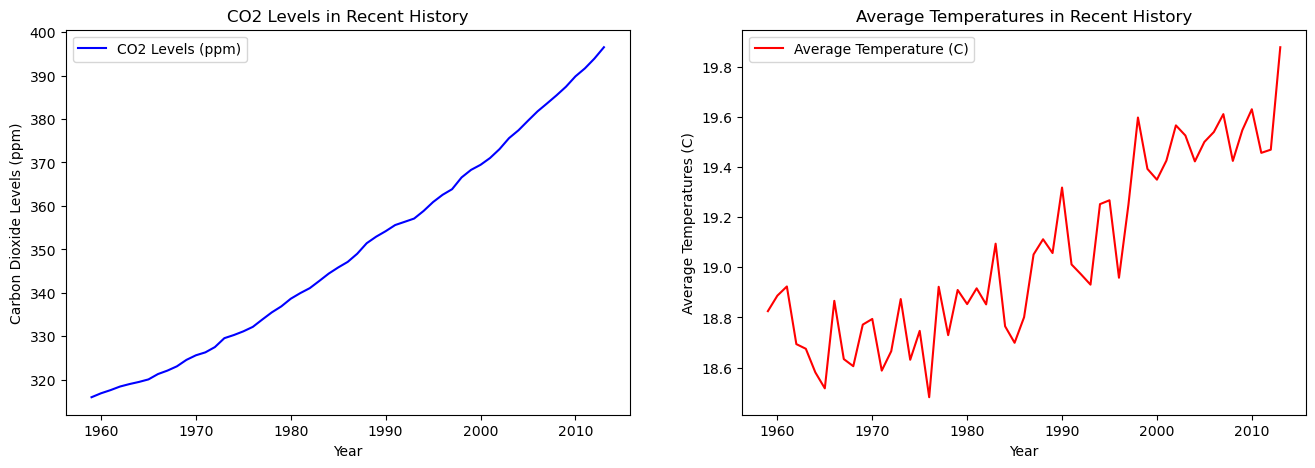

In [167]:
# Create a figure with a GridSpec layout
fig = plt.figure(figsize=(16, 5))
gs = GridSpec(1, 2, figure=fig)

# First subplot for CO2 levels
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(correlation_df['Year'], correlation_df['Average CO2 (ppm)'], label='CO2 Levels (ppm)', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Carbon Dioxide Levels (ppm)')
ax1.set_title('CO2 Levels in Recent History')
ax1.legend()

# Second subplot for Average Temperatures
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(correlation_df['Year'], correlation_df['AverageTemperature'], label='Average Temperature (C)', color='red')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Temperatures (C)')
ax2.set_title('Average Temperatures in Recent History')
ax2.legend()
plt.show()

### A correlation begins to show its head

Its obvious that over time, the CO2 levels in our atmosphere have drastically increased. In 1960, there were roughly 310PPM of carbon dioxide in the air. At the same time, the average world temperature in 1960 was around 18.8° C, which roughly translates to 65° F.44

Ignoring the occasional temperature fluctuations, it is very obvious that the average temperature of Earth is rapidly increasing along with the increasing CO2 levels, which traps heat in our atmosphere.

# Tree Coverage Data

In [173]:
# filter columns
columns_to_keep = ['Country Name', 'Country Code'] + [col for col in trees_df.columns if 'Forest Area' in col]
trees_df = trees_df[columns_to_keep]

### Map the Data

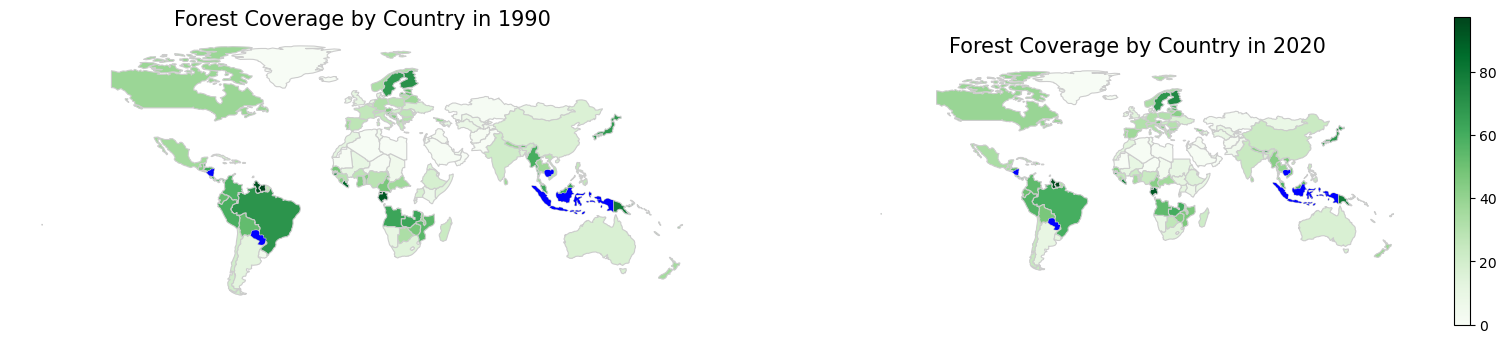

In [177]:
world = gpd.read_file('world/world_lowres.shp')

# Merge the world GeoDataFrame with trees_df on 'Country Name'
merged = world.merge(trees_df, how='left', left_on='ADMIN', right_on='Country Name')

highlight_countries = ['Nicaragua', 'Paraguay', 'Gambia, The Country', 'Cambodia', 'Indonesia']

# Create a new column for color
merged['color'] = merged['ADMIN'].apply(lambda x: 'blue' if x in highlight_countries else 'green')

# Create a figure with two subplots for side-by-side display
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))

# Plot the map for 1990
merged.plot(column="Forest Area 1990", cmap='Greens', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=False)
ax1.set_title('Forest Coverage by Country in 1990', fontdict={'fontsize': '15', 'fontweight': '3'})
ax1.axis('off')

# Highlight specific countries
merged[merged['ADMIN'].isin(highlight_countries)].plot(ax=ax1, color='blue')

# Plot the map for 2020
merged.plot(column="Forest Area 2020", cmap='Greens', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=True)
ax2.set_title('Forest Coverage by Country in 2020', fontdict={'fontsize': '15', 'fontweight': '3'})
ax2.axis('off')

# Highlight specific countries in 2020
merged[merged['ADMIN'].isin(highlight_countries)].plot(ax=ax2, color='blue')

# Display both plots side by side
plt.show()

# Well that doesn't look like much

## Let's track the top 5 biggest changes in forest coverage and make this obvious

In [181]:
# Calculate the difference between Forest Area 2020 and Forest Area 1990
trees_df['Difference 1990-2020'] = trees_df['Forest Area 2020'] - trees_df['Forest Area 1990']

# Sort the DataFrame by the difference in descending order
top_countries = trees_df.sort_values(by='Difference 1990-2020', ascending=True)

# Get the top 5 countries
bot_5_countries = top_countries.head(5)

# Display the top 5 countries with the highest difference
bot_5_countries = bot_5_countries[['Country Name', 'Forest Area 1990', 'Forest Area 2020', 'Difference 1990-2020']]

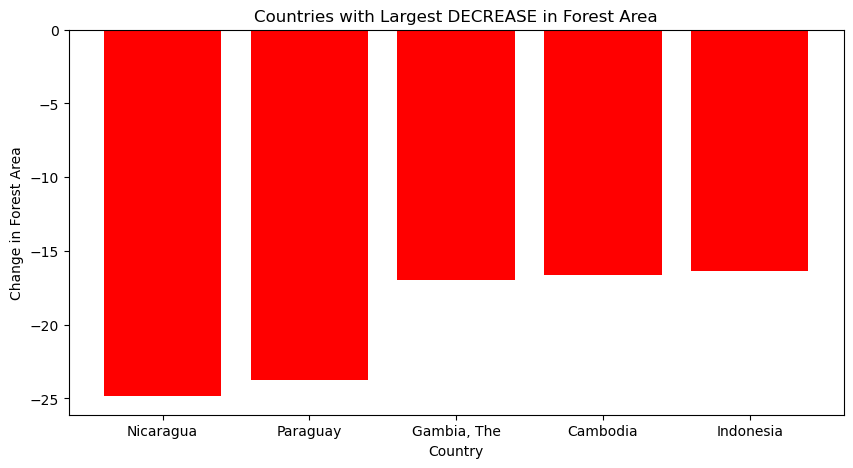

In [183]:
countries = bot_5_countries['Country Name']
differences = bot_5_countries['Difference 1990-2020']

plt.figure(figsize=(10,5))
plt.bar(countries, differences, color='red')

plt.xlabel('Country')
plt.ylabel('Change in Forest Area')
plt.title('Countries with Largest DECREASE in Forest Area')

plt.show()

## We can see countries adversely affected by deforestation

So it seems from 1990-2020, the highest change in forest coverage around the world was a net increase of nearly 25% of a countries forest area.

In [187]:
# Sort the DataFrame by the difference in descending order
top_countries = trees_df.sort_values(by='Difference 1990-2020', ascending=False)

# Get the top 5 countries
top_5_countries = top_countries.head(5)

# Display the top 5 countries with the highest difference
top_5_countries = top_5_countries[['Country Name', 'Forest Area 1990', 'Forest Area 2020', 'Difference 1990-2020']]

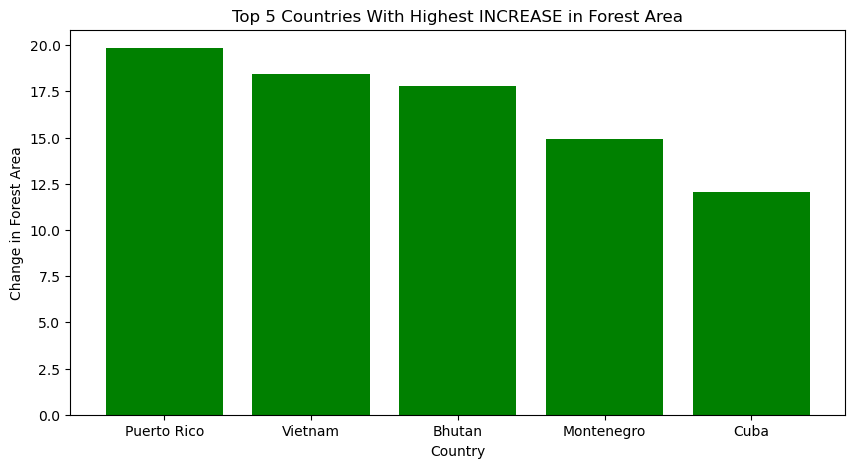

In [189]:
countries = top_5_countries['Country Name']
differences = top_5_countries['Difference 1990-2020']

plt.figure(figsize=(10,5))
plt.bar(countries, differences, color='green')

plt.xlabel('Country')
plt.ylabel('Change in Forest Area')
plt.title('Top 5 Countries With Highest INCREASE in Forest Area')

plt.show()

In [191]:
world = gpd.read_file('world/world_lowres.shp')
temps_country_df.head()

# merged = world.merge(temps_country_df, how='left', left_on='ADMIN', right_on='Country')

# # Plot the map
# fig, ax = plt.subplots(1, 1, figsize=(25, 10))
# merged.plot(column="% Change", cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# # Add title and axis off
# ax.set_title('Forest Coverage by Country in 2020', fontdict={'fontsize': '15', 'fontweight': '3'})
# ax.axis('off')

# plt.show()

,Year,Country,AverageTemperature
0,1743,Albania,8.620
1,1743,Andorra,7.556
2,1743,Austria,2.482
3,1743,Belarus,0.767
4,1743,Belgium,7.106
